In [60]:
# Time Series Analysis in Python,hp-filter,EWMA,ETS,ARIMA,ARMA using statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
df = sm.datasets.macrodata.load_pandas().data

In [38]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [39]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [40]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [41]:
df.index = index

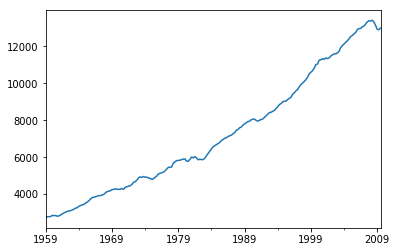

In [42]:
df['realgdp'].plot()

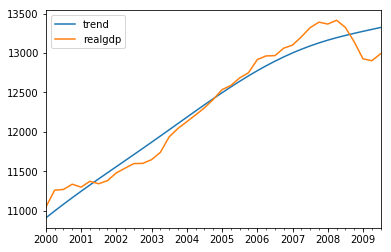

In [43]:
#Hodrick Prescott Filter
#To remove the cyclical trend from Time Series Data
#Result is a smooth-curved representation of Time Series Data

gdp_cycle,gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])
df['trend'] = gdp_trend
df[['trend','realgdp']]["2000-03-31":].plot()

In [44]:
airline = pd.read_csv("airline_passengers.csv",index_col='Month')
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


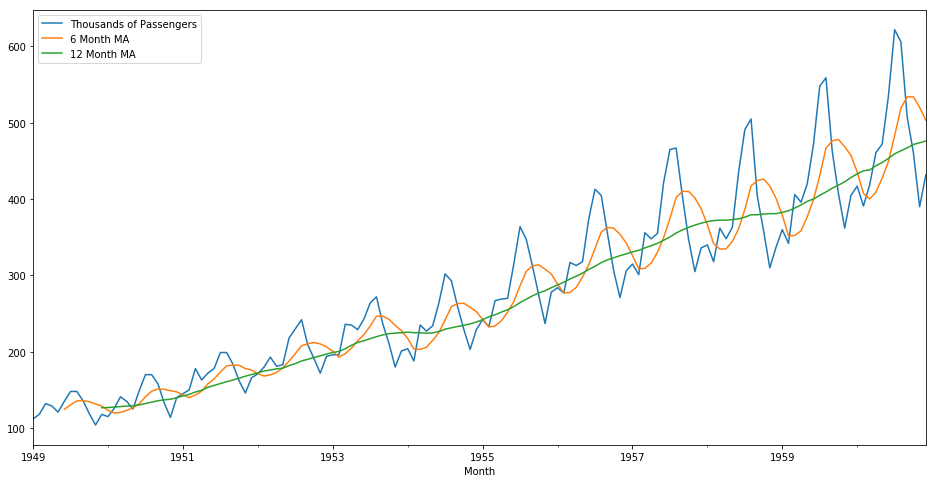

In [45]:
#Calculate Simple Moving average for 6 months and 12 months
airline['6 Month MA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12 Month MA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot(figsize=(16,8));

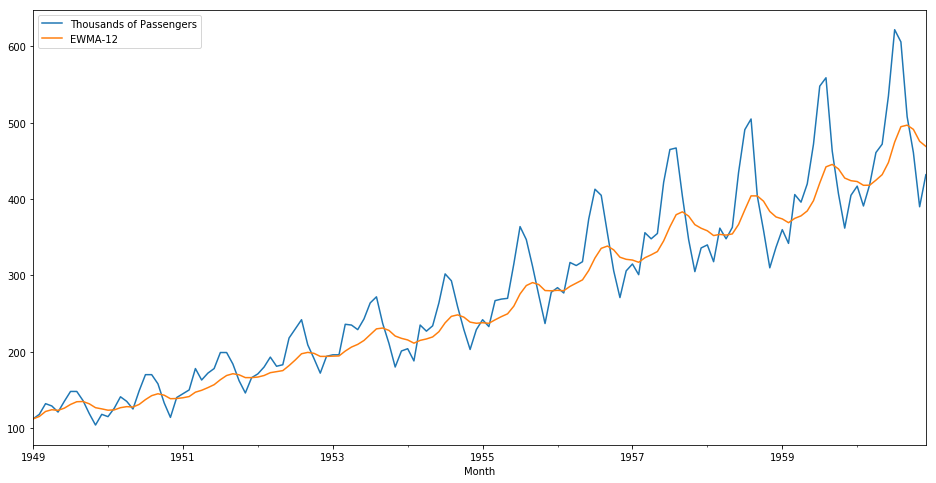

In [46]:
#Calcute Exponential Moving Average (EWMA)
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers','EWMA-12']].plot(figsize=(16,8));
#Points are weighted heavier that are closer to the present values as opposed to the historical ones


In [52]:
#ETS (Error Trend Seasonality)

# Multiplicative model
result = seasonal_decompose(airline['Thousands of Passengers'],model = 'multiplicative')

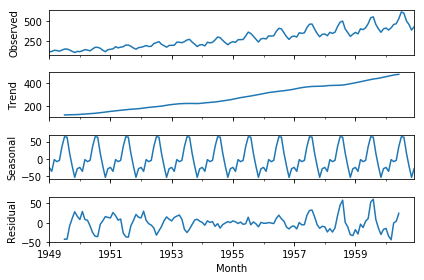

In [57]:
fig = result.plot()

In [53]:
result = seasonal_decompose(airline['Thousands of Passengers'],model = 'additive')

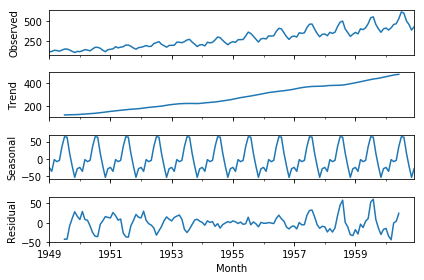

In [56]:
fig = result.plot()

In [59]:
# Autocorrelation plot shows the correlation of the time series itself lagged by time x units,i.e,y axis is the correlation and x axis is the number of lags
# Types of autocrorrelation plots
# 1. Gradual Decline
# 2. Sharp Drop Off

In [61]:
# Setting Values for ARIMA models
# 1. If autocorrelation plot shows positive autocorrelation at first lag,use AR terms
# 2. If autocorrelation plot shows negative autocorrelation at first lag,use MA terms
# Set p,d,q terms depending on these values
# p : Number of lag observations included in the model
# d : Number of times the raw observations are differenced
# q : The size of the moving average window,order of the moving average
# A sharp drop after lag "k" suggests that an AR-k model should be implemented
# However,if there is a gradual decline then MA model should be used

In [71]:
# ARIMA model code
# General process of creating an ARIMA model:
# 1. Visualize Time Series Data
# 2. Make the time series data stationary
# 3. Plot correlationa and autocorrelation charts
# 4. Construct the ARIMA model
# 5. Use the model to make predictions(Forecasting)

# Monthly milk production dataset
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.columns = ['Month','Milk in pounds per cow']
df.drop(168,axis=0,inplace=True)

In [84]:
# Convert Month to datetime index
df['Month'] = pd.to_datetime(df['Month'])

# Set index of DataFrame to be Month colunn
df.set_index('Month',inplace = True)


,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [87]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


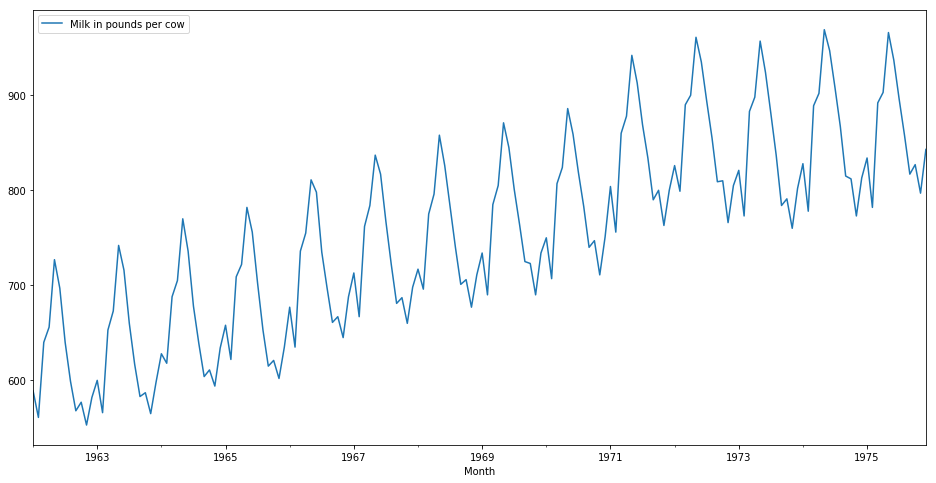

In [89]:
df.plot(figsize=(16,8));

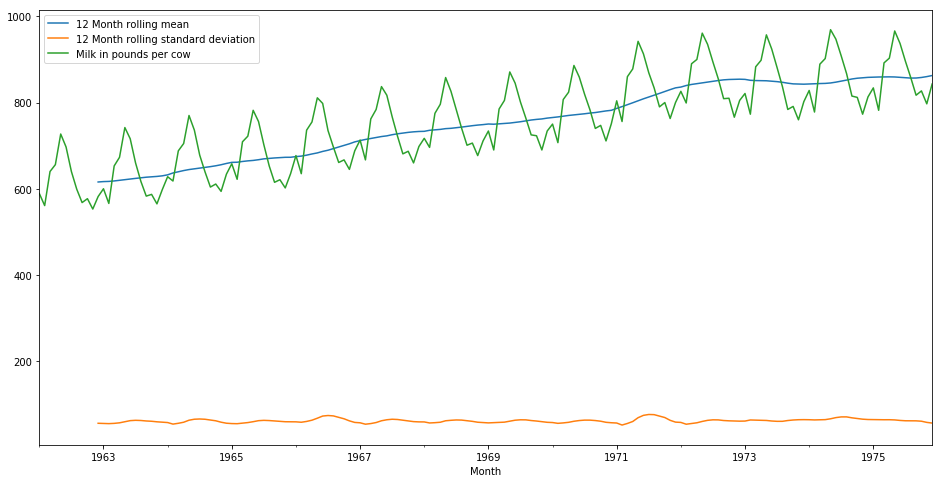

In [95]:
# Calculate yearly moving average and standard deviation
df['Milk in pounds per cow'].rolling(window = 12).mean().plot(label="12 Month rolling mean",figsize=(16,8))
df['Milk in pounds per cow'].rolling(window = 12).std().plot(label="12 Month rolling standard deviation")
df['Milk in pounds per cow'].plot()
plt.legend();

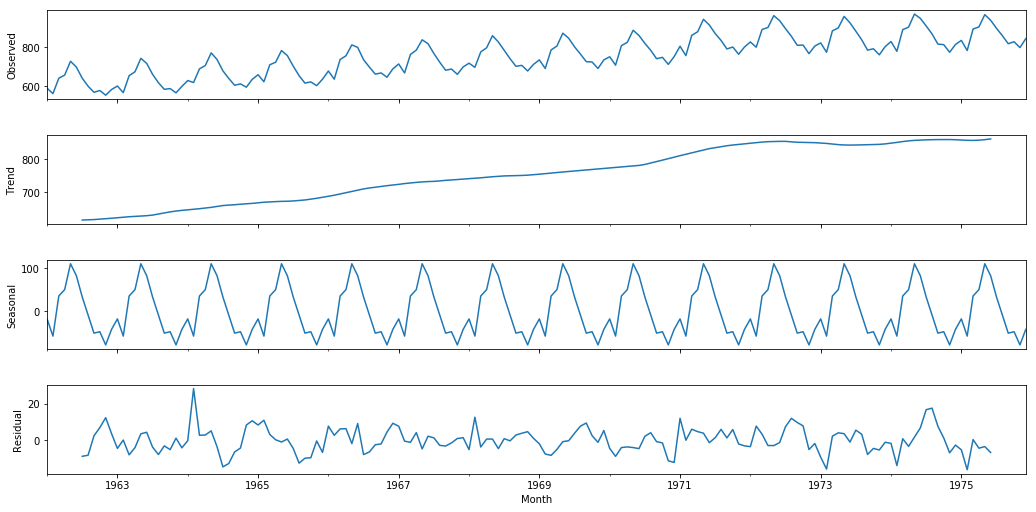

In [102]:
# Get Seasonality components for every 12 months
decompostion = seasonal_decompose(df['Milk in pounds per cow'],freq = 12)
fig = decompostion.plot();
fig.set_size_inches(16,8)

In [103]:
# Test for stationarity
# Dicky Fuller test
# Null Hypothesis - The Time Series is Non Stationary
# Alternate Hypothesis - The Time Series has no unit root and is Stationary
# p-value of less than 0.05 ,reject null hypothesis
from statsmodels.tsa.stattools import adfuller

In [ ]:
dftest_result = adfuller(df['Milk in pounds per cow'])

In [137]:
 #Function for dicky fuller test and pretty printing
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky Fuller Test")
    labels = ["ADF Test Statistic","p-value","Number of lags","Number of Observations used"]
    for val,label in zip(result,labels):
        print(label + " " + str(val))
    if(result[1] <= 0.05):
        print("Strong Evidence against Null Hypothesis")
        print("Reject Null Hypothesis")
        print("Data is Stationary")
    else:
        print("Weak Evidence against Null Hypothesis")
        print("Fail to reject Null Hypothesis")
        print("Data is not Stationary")

In [138]:
# Check p-value for our Time Series
adf_check(df['Milk in pounds per cow'])

Augmented Dicky Fuller Test
ADF Test Statistic -1.3038115874221248
p-value 0.6274267086030337
Number of lags 13
Number of Observations used 154
Weak Evidence against Null Hypothesis
Fail to reject Null Hypothesis
Data is not Stationary


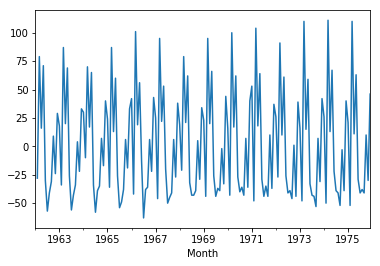

In [139]:
# Calculate first difference time series
df['First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)
df['First Difference'].plot();

In [140]:
adf_check(df['First Difference'].dropna())

Augmented Dicky Fuller Test
ADF Test Statistic -3.05499555865311
p-value 0.030068004001782334
Number of lags 14
Number of Observations used 152
Strong Evidence against Null Hypothesis
Reject Null Hypothesis
Data is Stationary


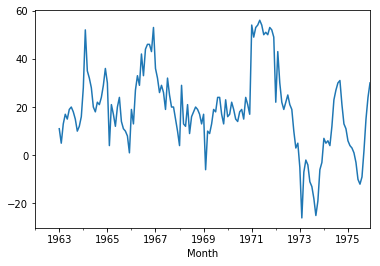

In [141]:
# Calculate Seasonal difference
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)
df['Seasonal Difference'].plot();

In [142]:
adf_check(df['Seasonal Difference'].dropna())


Augmented Dicky Fuller Test
ADF Test Statistic -2.335419314359397
p-value 0.16079880527711382
Number of lags 12
Number of Observations used 143
Weak Evidence against Null Hypothesis
Fail to reject Null Hypothesis
Data is not Stationary


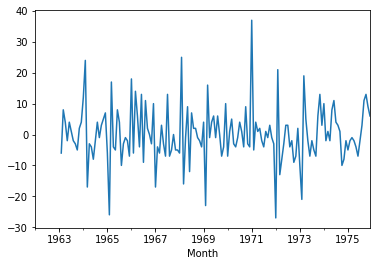

In [143]:
# Since seasonal difference results in a non stationary time series, calculate Seasonal first difference

df['First Seasonal Difference'] = df['First Difference'] - df['First Difference'].shift(12)
df['First Seasonal Difference'].plot();


In [148]:
adf_check(df['First Seasonal Difference'].dropna())

Augmented Dicky Fuller Test
ADF Test Statistic -5.038002274921979
p-value 1.865423431878876e-05
Number of lags 11
Number of Observations used 143
Strong Evidence against Null Hypothesis
Reject Null Hypothesis
Data is Stationary


In [150]:
# AutoCorrelation plots and Partial AutoCorrelation plots
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

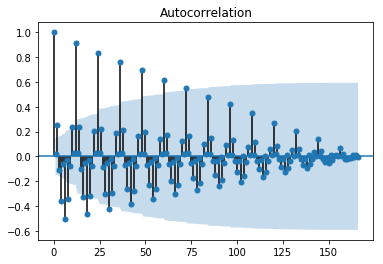

In [152]:
# Autocorrelation plot for AR-1 Time Series 
fig_first = plot_acf(df['First Difference'].dropna());

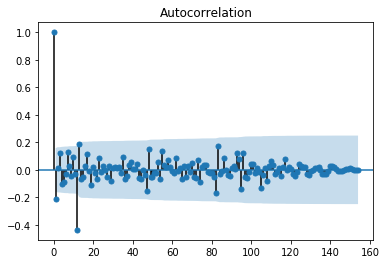

In [153]:
# Autocorrelation plot for Seasonal First Difference Time Series
fig_seasonal_first = plot_acf(df['First Seasonal Difference'].dropna());

In [155]:
# ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [195]:
# Seasonal ARIMA Exongenous variables
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order = (0,1,0),seasonal_order=(1,1,1,12));

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [160]:
result = model.fit()

In [161]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Thu, 27 Jun 2019   AIC                           1074.131
Time:                                    00:22:49   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

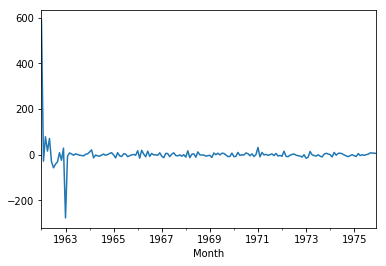

In [168]:
result.resid.plot();

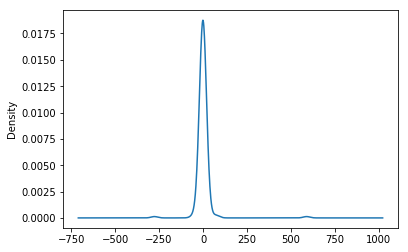

In [167]:
result.resid.plot(kind='kde');

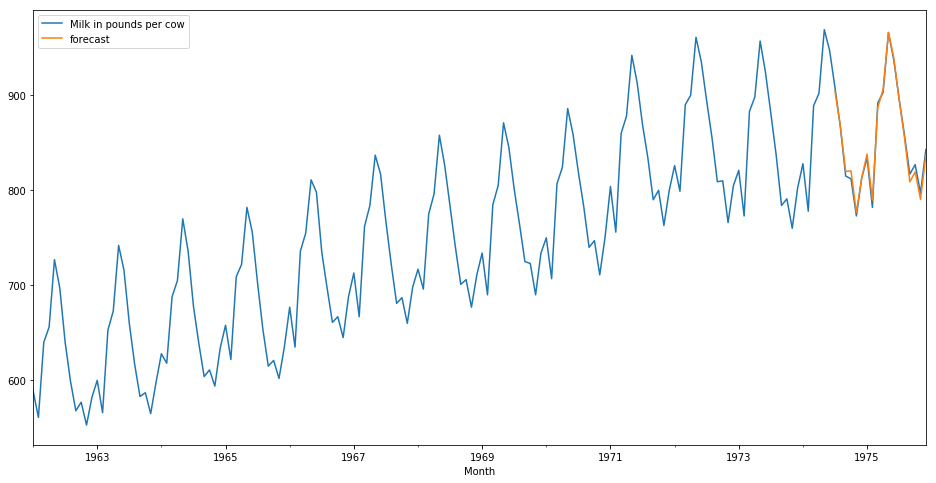

In [171]:
# Predict for existing data point values and compare the visualisation
df['forecast'] = result.predict(start=150,end=168)
df[['Milk in pounds per cow','forecast']].plot(figsize=(16,8));

In [187]:
#Create forecast for future values

In [188]:
from pandas.tseries.offsets import DateOffset


In [189]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(1,24)]

In [190]:
future = pd.DataFrame(index = future_dates,columns = df.columns)

In [191]:
future.head()

,Milk in pounds per cow,First Difference,Seasonal Difference,First Seasonal Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN


In [192]:
final_df = pd.concat([df,future])

In [193]:
final_df['forecast'] = result.predict(start = 168,end = 192)

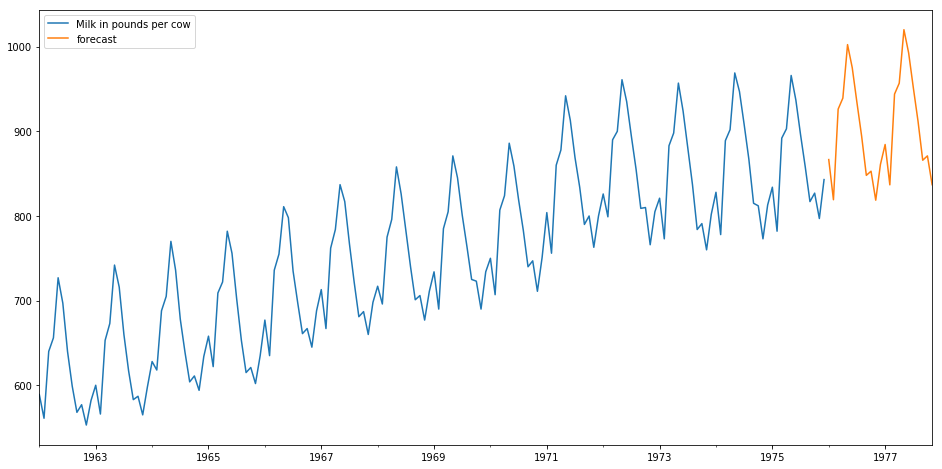

In [194]:
final_df[['Milk in pounds per cow','forecast']].plot(figsize=(16,8));